## Script to plot eigenvalue spectra
- xlim and ylim on spectrum plots

In [134]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import pickle

### Settings to modify

In [135]:
versions = np.array(['1-link', '2-links'])
name = versions[0]

# adding using unstable eigenvalues
unstable = False

# limits on size of community matrices
nMin = 2
nMax = 8

# number of files with data
fMin = 0
fMax = 1

# parameters for histogram data (for comparison)
rangeReal = [-6,4]
binsReal = 400

filename = name + '_N' + str(nMin) +'-'+ str(nMax-1)
print('filename:',filename)

filename: 1-link_N2-7


### Importing data
Merge unstable and stable?

In [136]:
partData = []

for f in range(fMin, fMax) :
    #partData.append(np.loadtxt('../data/' + name + '/eig_stab.txt'))
    partData.append(np.loadtxt('/home/jovyan/work/bachelor_data/old/' + name + '/eig_stab_0'+str(f)+'.txt'))

data = np.concatenate(partData)
data = data[:,1:]
#data.shape

### Sorting data
Remove duplicates and sorting after size

In [137]:
# Removing duplicates
# perform lex sort and get sorted data
sorted_idx = np.lexsort(data.T)
sorted_data =  data[sorted_idx,:]

# get unique row mask
row_mask = np.append([True],np.any(np.diff(sorted_data,axis=0),1))

# get unique rows
uniqueData = sorted_data[row_mask]

size = uniqueData[:,0].astype(int)
eigData = uniqueData[:,1:]

print(f'Number of unique food webs: {len(size):2.0f}\n\nSize:  #')



# sorting after size
real, imag = [], []

for n in range(min(size), max(size)+1) :
    mask = (size == n)
    dataTemp = eigData[mask]
    realTemp = np.concatenate(dataTemp.T[0:2*n:2])
    imagTemp = np.concatenate(dataTemp.T[1:2*n:2])

    real.append(realTemp)
    imag.append(imagTemp)
    

for n in range(min(size), max(size)) :
    print(f'{n:2.0f}:   {len(real[n])/n:2.0f}')
 

Number of unique food webs: 9027

Size:  #
 1:   444
 2:   1540
 3:   1031
 4:   2796
 5:   989
 6:   2319
 7:   523
 8:   1109
 9:   166
10:   294
11:   34
12:   57


In [138]:
# saving sorted data
with open('sorted_data/real_' + filename + '.pickle', 'wb') as file:
    pickle.dump(real, file)
    
with open('sorted_data/imag_' + filename + '.pickle', 'wb') as file:
    pickle.dump(imag, file)

#### Plotting

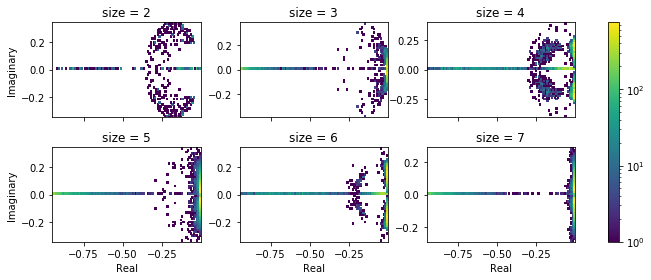

In [139]:
bins = [100,50]

fig, axes = plt.subplots(2,3, figsize=(10,4), sharex=True, sharey=False)
axes[0,0].set(ylabel='Imaginary')
axes[1,0].set(xlabel='Real', ylabel='Imaginary')
axes[1,1].set(xlabel='Real')
axes[1,2].set(xlabel='Real')

i = nMin
for ax in axes.flat:
    ax.set(title='size = ' + str(i))
    _,_,_, im = ax.hist2d(real[i-min(size)], imag[i-min(size)], bins=bins, norm = mpl.colors.LogNorm());
    i += 1

    fig.tight_layout();
fig.colorbar(im, ax=axes.ravel().tolist())  ;      

In [140]:
fig.savefig('figs/spectra_' + filename +'.png', dpi=100)

### Histogram of real eigenvalues
Producing values for comparing spectra

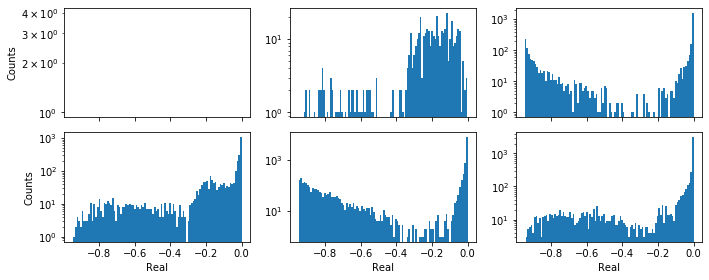

In [141]:
binsReal = 100

fig, axes = plt.subplots(2,3, figsize=(10,4), sharex=True, sharey=False)
axes[0,0].set(ylabel='Counts')
axes[1,0].set(xlabel='Real', ylabel='Counts')
axes[1,1].set(xlabel='Real')
axes[1,2].set(xlabel='Real')

i = 0
countsReal = np.zeros([nMax-nMin, binsReal])
binEdgesReal = np.zeros([nMax-nMin, binsReal+1])

for ax in axes.flat:
    #ax.set(title='size = ' + str(nMin+i))
    #countsReal[i,:], binEdgesReal[i,:] ,_ = ax.hist(real[i], bins=binsReal, range=rangeReal, density=True);
    countsReal[i,:], binEdgesReal[i,:] ,_ = ax.hist(real[i], bins=binsReal);
    ax.set(yscale='log')
    i += 1
    
fig.tight_layout();

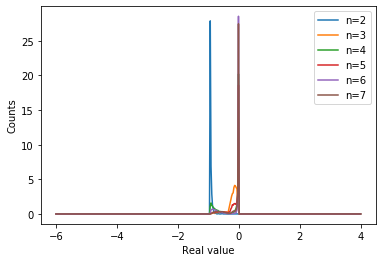

In [94]:
binCentersReal = (binEdgesReal[:,0:-1] + binEdgesReal[:,1:])/2

fig, ax = plt.subplots(1,1, figsize=(6,4));
for i in range(nMax-nMin) :
    ax.plot(binCentersReal[i], countsReal[i], label='n='+str(nMin+i));
    
ax.set(xlabel='Real value', ylabel='Counts')
ax.legend();

In [107]:
#np.savetxt('sorted_data/x' + filename + '.txt', binCentersReal, newline='\n')
#np.savetxt('sorted_data/y' + filename + '.txt', countsReal, newline='\n')

### Histogram of imaginary eigenvalues

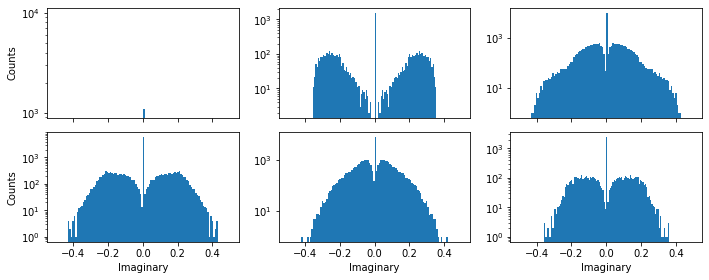

In [96]:
bins = 100

fig, axes = plt.subplots(2,3, figsize=(10,4), sharex=True, sharey=False)
axes[0,0].set(ylabel='Counts')
axes[1,0].set(xlabel='Imaginary', ylabel='Counts')
axes[1,1].set(xlabel='Imaginary')
axes[1,2].set(xlabel='Imaginary')

i = 0
countsImag = np.zeros([nMax-nMin, bins])
binEdgesImag = np.zeros([nMax-nMin, bins+1])

for ax in axes.flat:
    #ax.set(title='size = ' + str(nMin+i))
    countsImag[i,:], binEdgesImag[i,:] ,_ = ax.hist(imag[i], bins=bins);
    ax.set(yscale='log')
    i += 1

fig.tight_layout();